# Dynamics Homework 3

Liam Dubay

February 17, 2022

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

### (a)

In general, the period of a synchronous orbit is $T_s=2\pi/\Omega$, where $\Omega$ is the planet's spin angular velocity. Using Kepler's 3rd law, we find

$$T_s^2 = \frac{4\pi^2a_s^3}{\mu}$$

so

$$a_s = \Big(\frac{\mu}{\Omega^2}\Big)^{1/3}$$

where $\mu=G(M_m+M_p)$.

In [26]:
def a_synch(mu, omega):
    return (mu/omega**2)**(1/3)

omega = lambda T: 2*math.pi/T
G = 6.67e-11 #SI

# Sidereal rotation period
T_Earth = 0.997*24*60**2 # s
M_Earth = 5.972e24 # kg
print(f'Earth: {a_synch(G*M_Earth, omega(T_Earth)):.02e} m')

T_Mars = 1.026*24*60**2 # s
M_Mars = 6.4171e23 # kg
print(f'Mars: {a_synch(G*M_Mars, omega(T_Mars)):.02e} m')

T_Jup = 9.925 * 60**2 # s
M_Jup = 1.8982e27 # kg
print(f'Jupiter: {a_synch(G*M_Jup, omega(T_Jup)):.02e} m')

T_Sat = 10*60**2+33*60*38 # s
M_Sat = 5.683e26 # kg
print(f'Saturn: {a_synch(G*M_Sat, omega(T_Sat)):.02e} m')


Earth: 4.21e+07 m
Mars: 2.04e+07 m
Jupiter: 1.60e+08 m
Saturn: 2.28e+08 m


### (b)

For the case of Io and Jupiter, $\Omega>n$. We have the two equations for power

$$\dot E = -\tau(\Omega-n) \quad \rm{and} \quad \dot E = -\frac12\frac{M_m M_p}{M_m + M_p}na\dot a(\Omega-n),$$

and the equation for torque

$$\tau = \frac32 k_2\frac{GM_m^2}{a}\Big(\frac{R_p}{a}\Big)^5\frac1Q,$$

with the orbital mean motion 

$$n=\frac{2\pi}{T}=\sqrt{\frac{\mu}{a^3}}.$$

First, set the two equations for power equal to one another:

$$-\tau(\Omega-n) = -\frac12\frac{M_m M_p}{M_m + M_p}na\dot a(\Omega-n)$$
$$\tau = \frac12\frac{M_m M_p}{M_m + M_p}na\dot a.$$

Set this equal to the torque equation to yield

$$\frac32 k_2\frac{GM_m^2}{a}\Big(\frac{R_p}{a}\Big)^5\frac1Q = \frac12\frac{M_m M_p}{M_m + M_p}na\dot a$$
$$\dot a = 3k_2GM_m^2R_p^5\Big(\frac1Q\Big)\Big(\frac{M_m+M_p}{M_mM_p}\Big)n^{-1}a^{-7}$$
$$\dot a = 3k_2\mu \Big(\frac{M_m}{M_p}\Big)R_p^5\Big(\frac1Q\Big)\sqrt{\frac{a^3}{\mu}}a^{-7}$$
$$\dot a = 3k_2\sqrt\mu\Big(\frac{M_m}{M_p}\Big)R_p^5\Big(\frac1Q\Big)a^{-5.5}.$$

Consolidating most of the constants into $K=3k_2\sqrt\mu\Big(\frac{M_m}{M_p}\Big)R_p^5$, we arrive at a separable differential equation

$$\frac{da}{dt} = \frac{K}{Q}a^{-5.5}$$

which has the solution

$$a(t) = \Big(6.5\frac{K}{Q}t + C\Big)^{1/6.5}$$

where $C$ is the constant of integration. If we assume Io started at a synchronous orbit $a(t=0)=a_s$, we can solve for $C$:

$$a_s = a(0) = \Big(6.5\frac{K}{Q}(0)+C\Big)^{1/6.5} = C^{1/6.5} \implies C=a_s^{6.5}.$$

Io has since migrated out to its current position $a(t=t_\rm{now})=a_m$. Using this, we can finally solve for $Q$:

$$a_m = a(t_{\rm{now}}) = \Big(6.5\frac{K}{Q}t_{\rm{now}} + a_s^{6.5}\Big)^{1/6.5}$$
$$a_m^{6.5} - a_s^{6.5} = 6.5\frac{K}{Q}t_\rm{now}$$
$$Q = \frac{6.5Kt_\rm{now}}{a_m^{6.5} - a_s^{6.5}}.$$

Now we plug in the values to calculate $Q$.

In [27]:
G = 6.67e-11 #SI
M_Jup = 1.8982e27 # kg
M_Io = 8.9319e22 # kg
a_Io = 4.217e8 # m
R_Jup = 6.9911e7 # m
k2 = 0.37
t_now = 5e9*math.pi*10**7 # lifetime of solar system in s
T_Jup = 9.925 * 60**2 # s
omega = 2*math.pi / T_Jup # s^-1

mu = G*(M_Jup + M_Io)
K = 3*k2*math.sqrt(mu)*(M_Io/M_Jup)*R_Jup**5

Q = (6.5*K*t_now) / (a_Io**6.5 - a_synch(mu, omega)**6.5)
print(Q)

274918.8532106061


So for this scenario, $Q\approx2.7\times10^5$. As $a_s$ is the smallest possible orbit that Io could have started at, the denominator $a_m^{6.5} - a_s^{6.5}$ is consequently at its largest possible value, so this value of $Q$ is a lower limit on the true value. I'm fairly confident in my answer because [this source](https://link.springer.com/referenceworkentry/10.1007/978-3-642-11274-4_1319) claims that giant planets and stars tend to have $Q$-values of up to $10^6$, so as a lower limit $2.7\times10^5$ seems reasonable.

### (c)

In the $\Omega<n$ case, $\dot E=+\tau(\Omega-n)$, so the $t$-dependent term of $a$ flips sign. With this change, we invert the equation for $Q$ from the last part to get

$$\Delta t = -\frac{Q(R_p^{6.5} - (0.99a_s)^{6.5})}{6.5K} = \frac{Q((0.99a_s)^{6.5} - R_p^{6.5})}{6.5K}$$

In [30]:
delta_t = Q*((0.99*a_synch(mu, omega))**6.5 - R_Jup**6.5)/(6.5*K)
print(f'Time to impact: {delta_t/(math.pi*10**7):.03e} years')

Time to impact: 8.573e+06 years


In solar system time, 8.6 Myr is not long at all!

## Problem 2

I made the silly decision to try to plot this in Python instead of drawing it by hand. Why take ten minutes to solve a problem when you could take an hour?

In [31]:
# Two-body equations
def ellipse_polar(a, e, omega=0):
    p = a*(1-e**2)
    r = lambda theta: p / (1 + e*np.cos(theta - omega))
    return r

def true_anomaly(a, e):
    M = lambda t: 2*np.pi * a**(-3/2) * t # mean anomaly
    # approximation for small e
    nu = lambda M: M + 2*e*np.sin(M) + 1.25*e**2*np.sin(2*M)
    return lambda t: nu(M(t))

def plot_resonances(resonance, eccentricity=0.3):
    a_Jup = 5.2 # AU
    m_Jup = 1/1047 # Msun
    e_ast = eccentricity
    a_ast = a_Jup * (1/resonance)**(2/3)
    
    r_Jup = ellipse_polar(a_Jup, 0)
    theta_Jup = true_anomaly(a_Jup, 0)

    r_ast = ellipse_polar(a_ast, e_ast)
    theta_ast = true_anomaly(a_ast, e_ast)

    fig, axs = plt.subplots(1, 2, dpi=140, subplot_kw={'projection': 'polar'})

    tfine = np.linspace(0, a_Jup**(3/2), 1200, endpoint=False)
    t = tfine[::100]
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Inertial frame
    ax = axs[0]
    # Plot Jupiter (could have just done a simple circle, oh well)
    ax.plot(theta_Jup(tfine), r_Jup(theta_Jup(tfine)), color='k')
    ax.scatter(theta_Jup(t), r_Jup(theta_Jup(t)), marker='o', facecolors='w', edgecolors='k', zorder=10)
    # Plot 3:1 resonance asteroid
    ax.plot(theta_ast(tfine), r_ast(theta_ast(tfine)), color='k')
    ax.scatter(theta_ast(t), r_ast(theta_ast(t)), marker='o', color='k', s=16)
    # Plot Sun
    ax.scatter(0, 0, marker='o', s=100, color='k')
    # Label points
    xoffset = 0
    theta0 = 0
    for time, label in zip(t, alphabet):
        # Outline text with white border for visual clarity
        ax.annotate(label, (theta_Jup(time), r_Jup(theta_Jup(time))),
                    textcoords='offset points', xytext=(6, -6), va='center', ha='center',
                    fontweight='extra bold', color='w')
        ax.annotate(label, (theta_Jup(time), r_Jup(theta_Jup(time))),
                    textcoords='offset points', xytext=(6, -6), va='center', ha='center')
        # Offset labels once each orbit to avoid overlapping text
        if theta_ast(time) - 2*np.pi >= theta0:
            xoffset += 8
            theta0 = theta_ast(time)
        ax.annotate(label, (theta_ast(time), r_ast(theta_ast(time))),
                    textcoords='offset points', xytext=(6+xoffset, -6), va='center', ha='center',
                    fontweight='extra bold', color='w')
        ax.annotate(label, (theta_ast(time), r_ast(theta_ast(time))),
                    textcoords='offset points', xytext=(6+xoffset, -6), va='center', ha='center')
    ax.grid(None)
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.set_rmax(6)
    ax.set_title('Inertial frame')

    # Rotating frame
    ax = axs[1]
    # Plot Jupiter (could have just done a simple circle, oh well)
    ax.plot(theta_Jup(tfine), r_Jup(theta_Jup(tfine)), color='k', linestyle='--')
    ax.scatter(theta_Jup(0), r_Jup(theta_Jup(0)), marker='o', facecolors='w', edgecolors='k', zorder=10)
    # Plot 3:1 resonance asteroid
    ax.plot(theta_ast(tfine) - theta_Jup(tfine), r_ast(theta_ast(tfine)), color='k')
    ax.scatter(theta_ast(t) - theta_Jup(t), r_ast(theta_ast(t)), marker='o', color='k', s=16)
    # Plot Sun
    ax.scatter(0, 0, marker='o', s=100, color='k')
    # Label points
    xoffset = 0
    theta0 = 0
    for time, label in zip(t, alphabet):
        # Outline text with white border for visual clarity
        ax.annotate(label, (theta_ast(time) - theta_Jup(time), r_ast(theta_ast(time))),
                    textcoords='offset points', xytext=(6, -6), va='center', ha='center',
                    fontweight='extra bold', color='w')
        ax.annotate(label, (theta_ast(time) - theta_Jup(time), r_ast(theta_ast(time))),
                    textcoords='offset points', xytext=(6, -6), va='center', ha='center')
    ax.grid(None)
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.set_rmax(6)
    ax.set_title('Rotating frame')
    plt.show()

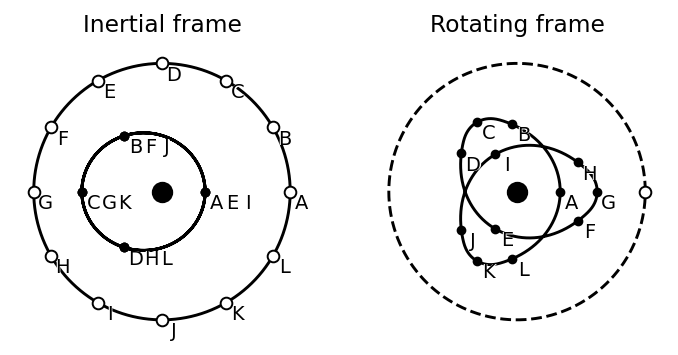

In [32]:
plot_resonances(3, eccentricity=0.3)

To double-check my results, the code can also reproduce a 2:1 resonance:

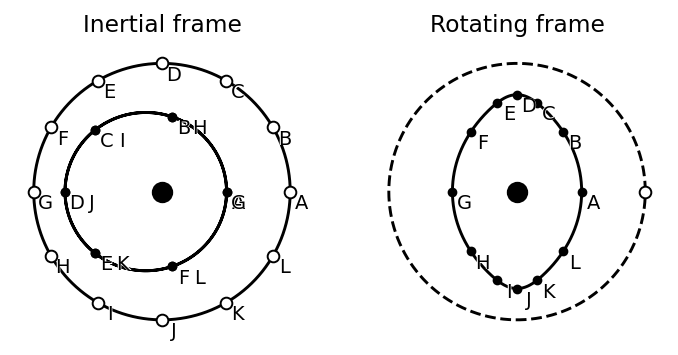

In [34]:
plot_resonances(2, eccentricity=0.2)

Just for fun, here's a crazy high-eccentricity orbit (although my function for calculating the true anomaly almost certainly breaks down for such high eccentricity):

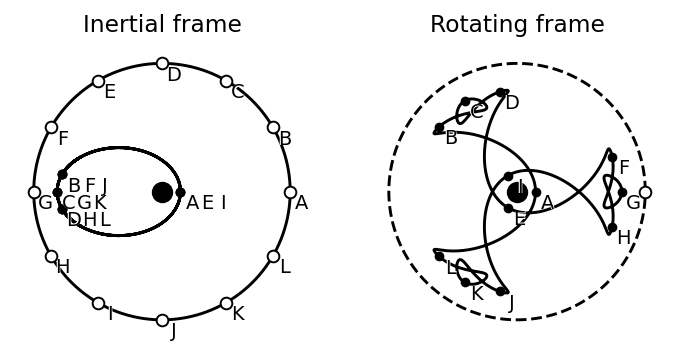

In [35]:
plot_resonances(3, eccentricity=0.7)

## Problem 3